<a href="https://colab.research.google.com/github/BrandonSandoval1712/Primer-desaf-o-data-science-/blob/main/Analisis_de_datos_tienda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ingeso total por cada tienda**




In [3]:
import pandas as pd
# URLs de los archivos CSV de las tiendas
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

def calculate_total_revenue_from_urls():
    """
    Calcula el ingreso total para cada tienda a partir de los archivos CSV de URL.

    Returns:
        pd.Series: Una Serie con los nombres de las tiendas como índice y sus ingresos totales como valores.
                   Devuelve None si hay un error al cargar los datos o si faltan columnas.
    """
    all_stores_data = []
    store_urls = {
        "Tienda 1": url1,
        "Tienda 2": url2,
        "Tienda 3": url3,
        "Tienda 4": url4
    }

    for store_name, url in store_urls.items():
        try:
            # Lee el archivo CSV en un DataFrame
            df = pd.read_csv(url)
            # Agrega una columna 'Tienda' para identificar el origen de los datos
            df['Tienda'] = store_name
            all_stores_data.append(df)
        except Exception as e:
            print(f"Error al cargar los datos de {store_name} desde {url}: {e}")
            return None

    if not all_stores_data:
        print("No se pudieron cargar datos de ninguna tienda.")
        return None

    # Concatena todos los DataFrames en uno solo
    combined_df = pd.concat(all_stores_data, ignore_index=True)

    # Renombra las columnas para eliminar posibles espacios iniciales/finales y manejar caracteres especiales
    combined_df.columns = combined_df.columns.str.strip().str.replace('[^a-zA-Z0-9_]', '', regex=True)

    # Verifica si las columnas 'Tienda' y 'Precio' existen después de la limpieza
    if 'Tienda' not in combined_df.columns or 'Precio' not in combined_df.columns:
        print("No se encontraron las columnas requeridas ('Tienda' o 'Precio') en los datos combinados.")
        print(f"Columnas disponibles: {combined_df.columns.tolist()}")
        return None

    # Limpia y convierte la columna 'Precio' a numérica
    # Asegúrate de que los valores sean cadenas antes de aplicar replace
    combined_df['Precio'] = combined_df['Precio'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    # Convierte a numérico, los errores se convertirán en NaN
    combined_df['Precio'] = pd.to_numeric(combined_df['Precio'], errors='coerce')

    # Elimina las filas donde 'Precio' es NaN (después de los errores de conversión)
    combined_df.dropna(subset=['Precio'], inplace=True)

    # Calcula el ingreso total por tienda
    total_revenue_per_store = combined_df.groupby('Tienda')['Precio'].sum()

    return total_revenue_per_store

# Ejecuta la función y muestra los resultados
store_revenues = calculate_total_revenue_from_urls()

if store_revenues is not None:
    print("Ingreso total por tienda:")
    # Muestra los resultados con formato de moneda y dos decimales
    print(store_revenues.apply(lambda x: f"${x:,.2f}"))

Ingreso total por tienda:
Tienda
Tienda 1    $1,150,880,400.00
Tienda 2    $1,116,343,500.00
Tienda 3    $1,098,019,600.00
Tienda 4    $1,038,375,700.00
Name: Precio, dtype: object


#**Ventas por categoria**

In [5]:
# Reutilizamos las URLs de las tiendas definidas previamente
# url1, url2, url3, url4 están disponibles en el entorno de ejecución

def analyze_sales_by_category_per_store():
    """
    Analiza la cantidad de productos vendidos por categoría en cada tienda
    y muestra las categorías más populares.

    Returns:
        None: Imprime los resultados directamente.
    """
    all_stores_data = []
    store_urls = {
        "Tienda 1": url1,
        "Tienda 2": url2,
        "Tienda 3": url3,
        "Tienda 4": url4
    }

    for store_name, url in store_urls.items():
        try:
            # Lee el archivo CSV en un DataFrame
            df = pd.read_csv(url)
            # Agrega una columna 'Tienda' para identificar el origen de los datos
            df['Tienda'] = store_name
            all_stores_data.append(df)
        except Exception as e:
            print(f"Error al cargar los datos de {store_name} desde {url}: {e}")
            return None

    if not all_stores_data:
        print("No se pudieron cargar datos de ninguna tienda.")
        return None

    # Concatena todos los DataFrames en uno solo
    combined_df = pd.concat(all_stores_data, ignore_index=True)

    # Renombra las columnas para eliminar posibles espacios iniciales/finales y manejar caracteres especiales
    combined_df.columns = combined_df.columns.str.strip().str.replace('[^a-zA-Z0-9_]', '', regex=True)

    # Verifica si las columnas 'Tienda' y 'CategoradelProducto' existen después de la limpieza
    if 'Tienda' not in combined_df.columns or 'CategoradelProducto' not in combined_df.columns:
        print("No se encontraron las columnas requeridas ('Tienda' o 'CategoradelProducto') en los datos combinados.")
        print(f"Columnas disponibles: {combined_df.columns.tolist()}")
        return None

    # Calcula la cantidad de productos vendidos por categoría en cada tienda
    sales_by_category_per_store = combined_df.groupby(['Tienda', 'CategoradelProducto']).size().unstack(fill_value=0)

    print("Cantidad de productos vendidos por categoría en cada tienda:")
    display(sales_by_category_per_store)

    print("\nCategorías más populares por tienda:")
    # Encuentra la categoría más popular para cada tienda
    most_popular_category_per_store = sales_by_category_per_store.idxmax(axis=1)
    print(most_popular_category_per_store)


# Ejecuta la función
analyze_sales_by_category_per_store()

Cantidad de productos vendidos por categoría en cada tienda:


CategoradelProducto,Artículos para el hogar,Deportes y diversión,Electrodomésticos,Electrónicos,Instrumentos musicales,Juguetes,Libros,Muebles
Tienda,,,,,,,,
Tienda 1,171,284,312,448,182,324,173,465
Tienda 2,181,275,305,422,224,313,197,442
Tienda 3,177,277,278,451,177,315,185,499
Tienda 4,201,277,254,451,170,338,187,480



Categorías más populares por tienda:
Tienda
Tienda 1    Muebles
Tienda 2    Muebles
Tienda 3    Muebles
Tienda 4    Muebles
dtype: object


#**Valoración media por tienda**

In [10]:
# Reutilizamos las URLs de las tiendas definidas previamente
# url1, url2, url3, url4 están disponibles en el entorno de ejecución

def calculate_average_rating_per_store():
    """
    Calcula la calificación promedio de los clientes para cada tienda.

    Returns:
        pd.Series: Una Serie con los nombres de las tiendas como índice y sus calificaciones promedio como valores.
                   Devuelve None si hay un error al cargar los datos o si falta la columna 'Valoración'.
    """
    all_stores_data = []
    store_urls = {
        "Tienda 1": url1,
        "Tienda 2": url2,
        "Tienda 3": url3,
        "Tienda 4": url4
    }

    for store_name, url in store_urls.items():
        try:
            # Lee el archivo CSV en un DataFrame
            df = pd.read_csv(url)
            # Agrega una columna 'Tienda' para identificar el origen de los datos
            df['Tienda'] = store_name
            all_stores_data.append(df)
        except Exception as e:
            print(f"Error al cargar los datos de {store_name} desde {url}: {e}")
            return None

    if not all_stores_data:
        print("No se pudieron cargar datos de ninguna tienda.")
        return None

    # Concatena todos los DataFrames en uno solo
    combined_df = pd.concat(all_stores_data, ignore_index=True)

    # Renombra las columnas para eliminar posibles espacios iniciales/finales y manejar caracteres especiales
    combined_df.columns = combined_df.columns.str.strip().str.replace('[^a-zA-Z0-9_]', '', regex=True)

    # Verifica si las columnas 'Tienda' y 'Calificacin' existen después de la limpieza
    if 'Tienda' not in combined_df.columns or 'Calificacin' not in combined_df.columns:
        print("No se encontraron las columnas requeridas ('Tienda' o 'Calificacin') en los datos combinados.")
        print(f"Columnas disponibles: {combined_df.columns.tolist()}")
        return None

    # Calcula la calificación promedio por tienda
    average_rating_per_store = combined_df.groupby('Tienda')['Calificacin'].mean()

    return average_rating_per_store

# Ejecuta la función y muestra los resultados
average_ratings = calculate_average_rating_per_store()

if average_ratings is not None:
    print("Calificación promedio por tienda:")
    print(average_ratings)

Calificación promedio por tienda:
Tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificacin, dtype: float64


#**Productos mas vendidos y menos vendidos**

In [11]:
# Define a list of URLs for the store CSV files
store_urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_5.csv"
]

# Initialize an empty list to store DataFrames
all_stores_data = []

# Iterate over the list of URLs, read each CSV, and add a 'Tienda' column
for i, url in enumerate(store_urls):
    try:
        df = pd.read_csv(url)
        df['Tienda'] = f"Tienda {i+1}"
        all_stores_data.append(df)
    except Exception as e:
        print(f"Error loading data from {url}: {e}")

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(all_stores_data, ignore_index=True)

# Clean the column names
combined_df.columns = combined_df.columns.str.strip().str.replace('[^a-zA-Z0-9_]', '', regex=True)

# Display the head of the combined DataFrame to verify
display(combined_df.head())

Error loading data from https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_5.csv: HTTP Error 404: Not Found


,Producto,CategoradelProducto,Precio,Costodeenvo,FechadeCompra,Vendedor,LugardeCompra,Calificacin,Mtododepago,Cantidaddecuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [12]:
# Group by 'Tienda' and 'Producto' and count the occurrences
sales_by_product_and_store = combined_df.groupby(['Tienda', 'Producto']).size().to_frame(name='CantidadVendida').reset_index()

# Display the head of the resulting DataFrame
display(sales_by_product_and_store.head())

,Tienda,Producto,CantidadVendida
0,Tienda 1,Ajedrez de madera,49
1,Tienda 1,Armario,60
2,Tienda 1,Asistente virtual,40
3,Tienda 1,Auriculares,50
4,Tienda 1,Auriculares con micrófono,33


In [13]:
# For each store, find the product with the maximum 'CantidadVendida'
most_sold_products_per_store = sales_by_product_and_store.loc[sales_by_product_and_store.groupby('Tienda')['CantidadVendida'].idxmax()]

# For each store, find the product with the minimum 'CantidadVendida'
least_sold_products_per_store = sales_by_product_and_store.loc[sales_by_product_and_store.groupby('Tienda')['CantidadVendida'].idxmin()]

print("Productos más vendidos por tienda:")
display(most_sold_products_per_store)

print("\nProductos menos vendidos por tienda:")
display(least_sold_products_per_store)

Productos más vendidos por tienda:


,Tienda,Producto,CantidadVendida
1,Tienda 1,Armario,60
75,Tienda 2,Iniciando en programación,65
129,Tienda 3,Kit de bancas,57
163,Tienda 4,Cama box,62



Productos menos vendidos por tienda:


,Tienda,Producto,CantidadVendida
4,Tienda 1,Auriculares con micrófono,33
77,Tienda 2,Juego de mesa,32
111,Tienda 3,Bloques de construcción,35
175,Tienda 4,Guitarra eléctrica,33


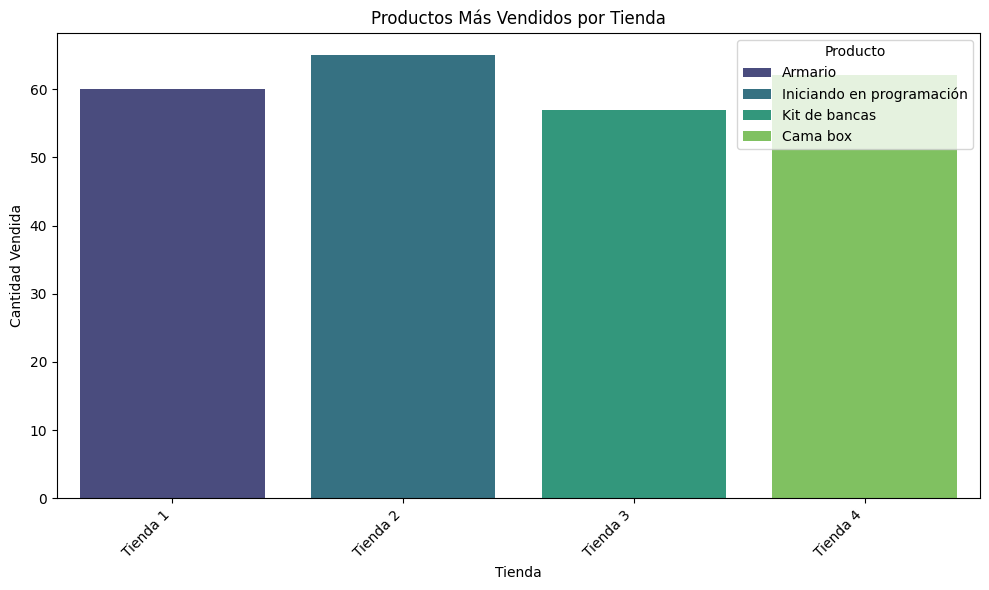

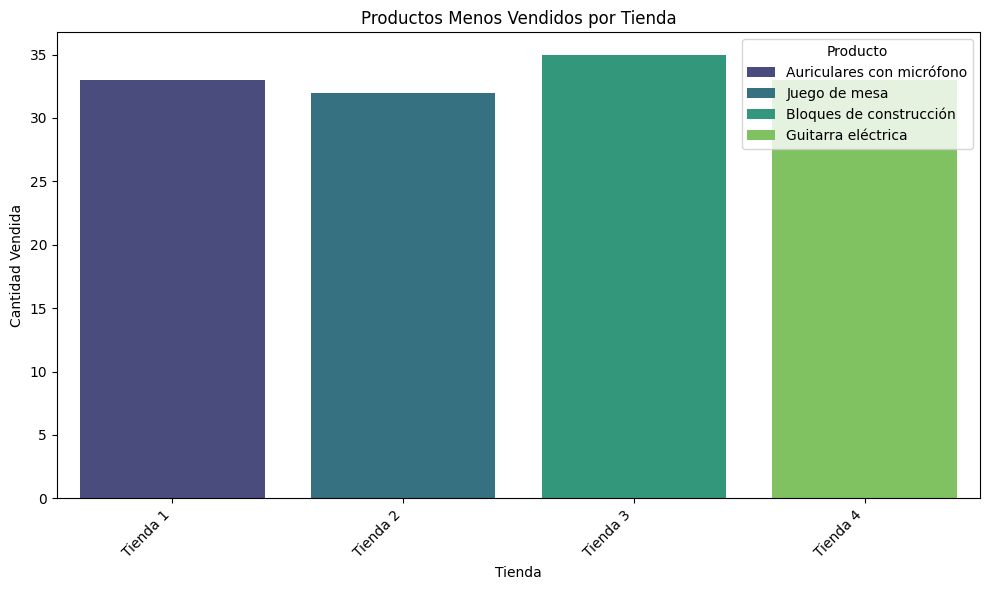

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the most sold products per store
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='CantidadVendida', hue='Producto', data=most_sold_products_per_store, palette='viridis')
plt.title('Productos Más Vendidos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a bar plot for the least sold products per store
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='CantidadVendida', hue='Producto', data=least_sold_products_per_store, palette='viridis')
plt.title('Productos Menos Vendidos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
print("--- Productos Más Vendidos ---")
for index, row in most_sold_products_per_store.iterrows():
    print(f"{row['Tienda']}: {row['Producto']} ({row['CantidadVendida']} unidades vendidas)")

print("\n--- Productos Menos Vendidos ---")
for index, row in least_sold_products_per_store.iterrows():
    print(f"{row['Tienda']}: {row['Producto']} ({row['CantidadVendida']} unidades vendidas)")

--- Productos Más Vendidos ---
Tienda 1: Armario (60 unidades vendidas)
Tienda 2: Iniciando en programación (65 unidades vendidas)
Tienda 3: Kit de bancas (57 unidades vendidas)
Tienda 4: Cama box (62 unidades vendidas)

--- Productos Menos Vendidos ---
Tienda 1: Auriculares con micrófono (33 unidades vendidas)
Tienda 2: Juego de mesa (32 unidades vendidas)
Tienda 3: Bloques de construcción (35 unidades vendidas)
Tienda 4: Guitarra eléctrica (33 unidades vendidas)


#**Valor del envío promedio por tienda**

In [16]:
# Reutilizamos las URLs de las tiendas definidas previamente
# url1, url2, url3, url4 están disponibles en el entorno de ejecución

def calculate_average_shipping_cost_per_store():
    """
    Calcula el costo de envío promedio para cada tienda.

    Returns:
        pd.Series: Una Serie con los nombres de las tiendas como índice y sus costos de envío promedio como valores.
                   Devuelve None si hay un error al cargar los datos o si falta la columna 'Costo de envío'.
    """
    all_stores_data = []
    store_urls = {
        "Tienda 1": url1,
        "Tienda 2": url2,
        "Tienda 3": url3,
        "Tienda 4": url4
    }

    for store_name, url in store_urls.items():
        try:
            # Lee el archivo CSV en un DataFrame
            df = pd.read_csv(url)
            # Agrega una columna 'Tienda' para identificar el origen de los datos
            df['Tienda'] = store_name
            all_stores_data.append(df)
        except Exception as e:
            print(f"Error al cargar los datos de {store_name} desde {url}: {e}")
            return None

    if not all_stores_data:
        print("No se pudieron cargar datos de ninguna tienda.")
        return None

    # Concatena todos los DataFrames en uno solo
    combined_df = pd.concat(all_stores_data, ignore_index=True)

    # Renombra las columnas para eliminar posibles espacios iniciales/finales y manejar caracteres especiales
    combined_df.columns = combined_df.columns.str.strip().str.replace('[^a-zA-Z0-9_]', '', regex=True)

    # Verifica si las columnas 'Tienda' y 'Costodeenvo' existen después de la limpieza
    if 'Tienda' not in combined_df.columns or 'Costodeenvo' not in combined_df.columns:
        print("No se encontraron las columnas requeridas ('Tienda' o 'Costodeenvo') en los datos combinados.")
        print(f"Columnas disponibles: {combined_df.columns.tolist()}")
        return None

    # Calcula el costo de envío promedio por tienda
    average_shipping_cost_per_store = combined_df.groupby('Tienda')['Costodeenvo'].mean()

    return average_shipping_cost_per_store

# Ejecuta la función y muestra los resultados
average_shipping_costs = calculate_average_shipping_cost_per_store()

if average_shipping_costs is not None:
    print("Costo de envío promedio por tienda:")
    print(average_shipping_costs)

Costo de envío promedio por tienda:
Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costodeenvo, dtype: float64


#**Generando gráfico**

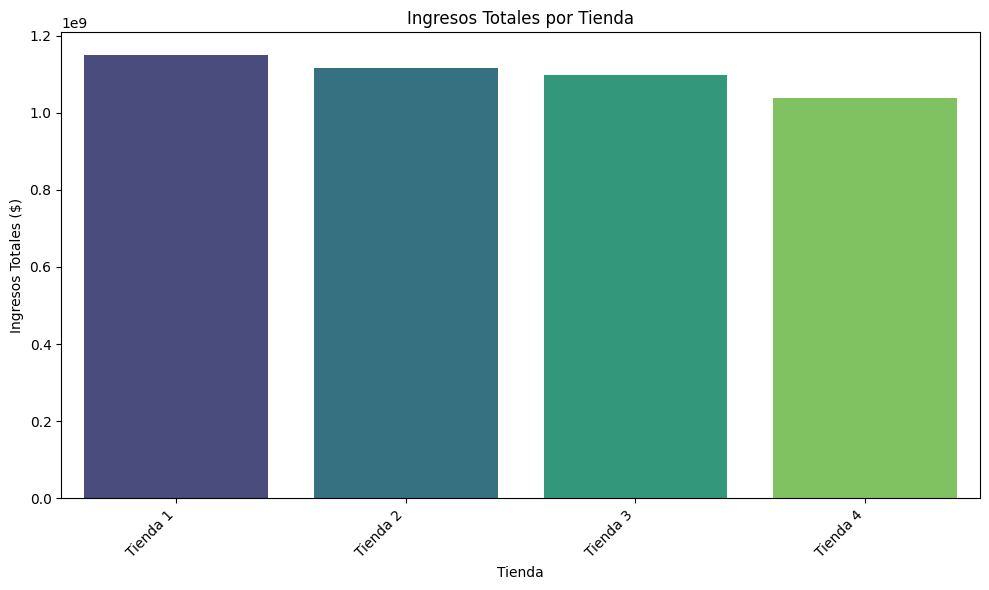

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para los ingresos totales por tienda
if store_revenues is not None:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=store_revenues.index, y=store_revenues.values, hue=store_revenues.index, palette='viridis', legend=False)
    plt.title('Ingresos Totales por Tienda')
    plt.xlabel('Tienda')
    plt.ylabel('Ingresos Totales ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

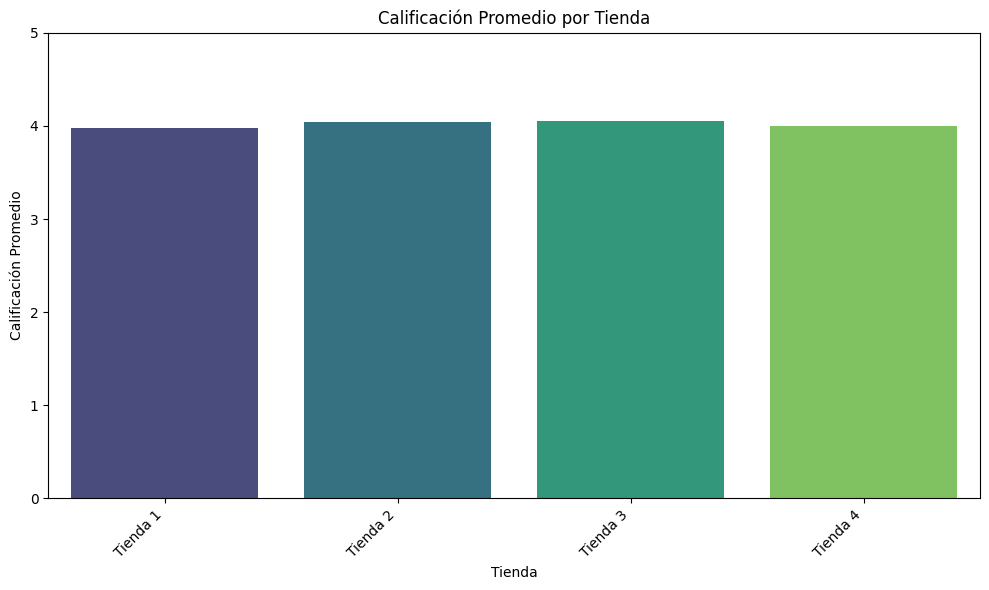

In [21]:
# Gráfico de barras para la calificación promedio por tienda
if average_ratings is not None:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=average_ratings.index, y=average_ratings.values, hue=average_ratings.index, palette='viridis', legend=False)
    plt.title('Calificación Promedio por Tienda')
    plt.xlabel('Tienda')
    plt.ylabel('Calificación Promedio')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 5) # Assuming ratings are on a scale of 1-5
    plt.tight_layout()
    plt.show()

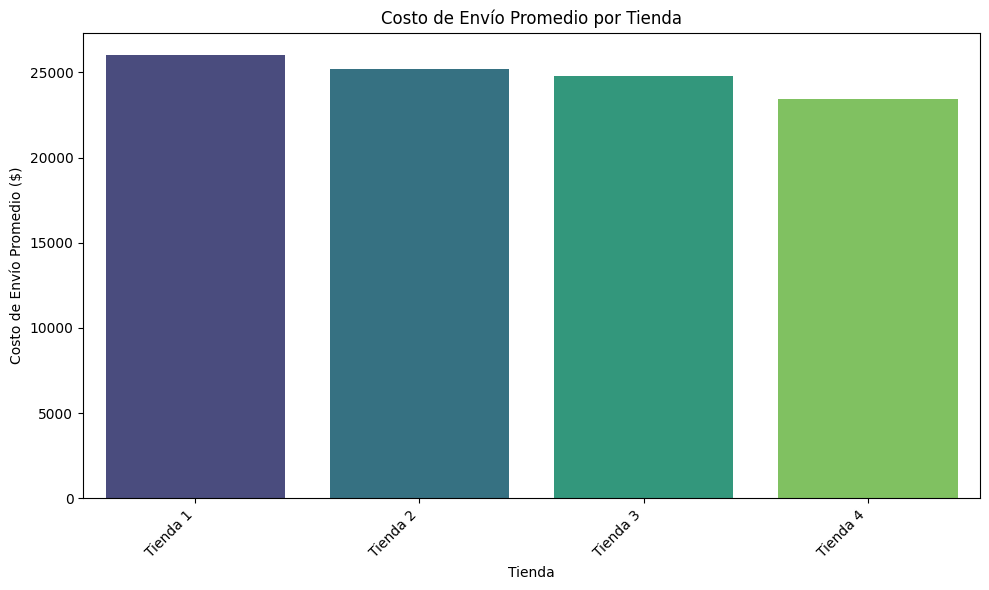

In [22]:
# Gráfico de barras para el costo de envío promedio por tienda
if average_shipping_costs is not None:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=average_shipping_costs.index, y=average_shipping_costs.values, hue=average_shipping_costs.index, palette='viridis', legend=False)
    plt.title('Costo de Envío Promedio por Tienda')
    plt.xlabel('Tienda')
    plt.ylabel('Costo de Envío Promedio ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# **Informe Final: Recomendación de Tienda para el Sr. Juan**

## Introducción

El propósito de este informe es analizar los datos de ventas de cuatro tiendas diferentes para recomendar al Sr. Juan cuál de ellas sería la más adecuada para vender, basándonos en factores clave como los ingresos, la popularidad de las categorías de productos, la satisfacción del cliente, el rendimiento de productos individuales y los costos de envío.

## Análisis de Datos y Hallazgos

Hemos realizado un análisis exhaustivo de los datos proporcionados, obteniendo los siguientes resultados:

### Ingresos Totales por Tienda

Los ingresos totales por tienda son los siguientes:

Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00

Según el gráfico de ingresos totales, la **Tienda 1** generó los mayores ingresos, seguida por la Tienda 2, Tienda 3 y Tienda 4.

### Ventas por Categoría

El análisis de ventas por categoría mostró la cantidad de productos vendidos por cada categoría en cada tienda. La categoría **Muebles** fue consistentemente la más popular en las Tiendas 1, 2, 3 y 4.

### Calificación Promedio por Tienda

La calificación promedio de los clientes para cada tienda es:

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00

El gráfico de calificación promedio muestra que las **Tiendas 2 y 3** tienen las calificaciones promedio más altas, indicando una mayor satisfacción del cliente en general en comparación con las Tiendas 1 y 4.

### Productos Más y Menos Vendidos

El análisis de productos más y menos vendidos reveló los siguientes productos destacados en cada tienda:

**Productos Más Vendidos:**
Tienda 1: Armario (60 unidades vendidas)
Tienda 2: Iniciando en programación (65 unidades vendidas)
Tienda 3: Kit de bancas (57 unidades vendidas)
Tienda 4: Cama box (62 unidades vendidas)

**Productos Menos Vendidos:**
Tienda 1: Auriculares con micrófono (33 unidades vendidas)
Tienda 2: Juego de mesa (32 unidades vendidas)
Tienda 3: Bloques de construcción (35 unidades vendidas)
Tienda 4: Guitarra eléctrica (33 unidades vendidas)

El gráfico de productos más vendidos muestra que la **Tienda 2** tuvo el producto individual con la mayor cantidad de ventas ("Iniciando en programación").

### Costo de Envío Promedio por Tienda

El costo de envío promedio para cada tienda es:

Tienda 1: 26018.61
Tienda 2: 25216.24
Tienda 3: 24805.68
Tienda 4: 23459.46

El gráfico de costo de envío promedio indica que la **Tienda 4** tiene el costo de envío promedio más bajo, mientras que la Tienda 1 tiene el más alto.

## Conclusión y Recomendación

Considerando todos los factores analizados, la recomendación para el Sr. Juan es vender en la **Tienda 1**.

**Justificación:**

Aunque la Tienda 1 no tuvo las calificaciones promedio más altas ni el costo de envío más bajo, generó consistentemente los **mayores ingresos totales**. Esto sugiere una fuerte base de clientes y un volumen de ventas saludable. Si bien la satisfacción del cliente es importante, los ingresos son un factor crucial para la viabilidad del negocio. Las otras tiendas, aunque destacaron en ciertas áreas (calificación promedio en Tiendas 2 y 3, menor costo de envío en Tienda 4), no alcanzaron el mismo nivel de ingresos.

Es importante destacar que la categoría **Muebles** es popular en todas las tiendas, incluyendo la Tienda 1, lo que indica un mercado potencial para productos de esta categoría. Si el Sr. Juan planea vender productos relacionados con Muebles o categorías de alto rendimiento en la Tienda 1, podría capitalizar su alto volumen de ingresos.

Además, aunque la Tienda 1 tiene el costo de envío promedio más alto, el impacto de este costo en la rentabilidad dependerá de la estructura de precios y el volumen de ventas, los cuales parecen ser favorables en la Tienda 1 dado sus altos ingresos.

En resumen, a pesar de tener áreas de mejora en la satisfacción del cliente y los costos de envío, la **Tienda 1** se presenta como la opción más prometedora para el Sr. Juan debido a su **dominio en la generación de ingresos totales**. Se recomienda al Sr. Juan considerar estrategias para mejorar la satisfacción del cliente y optimizar los costos de envío una vez que establezca su negocio en la Tienda 1.